# Titanic Sandbox for EDA and Model Tuning

In [13]:
%matplotlib inline

#turns off the depreciation warning messages in Jupyter at runtime.
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100 #show max 100 pandas columns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pylab as plot

#pylab dictionary preconfigures matplotlib pyplot params
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': "x-large",
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25,7]
}
plot.rcParams.update(params)

In [14]:
# sets up Jupyter to center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [15]:
# load training set data
df = pd.read_csv('train.csv')

In [16]:
df.shape

(891, 12)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId**: and id given to each traveler on the boat\
**Pclass**: the passenger class. It has three possible values: 1,2,3 (first, second and third class)\
The **Name** of the passeger\
The **Sex**\
The **Age**\
**SibSp**: number of siblings and spouses traveling with the passenger\
**Parch**: number of parents and children traveling with the passenger\
The **Ticket** number
The ticket **Fare**\
The **Cabin** number\
**Embarked**. This describe three possible areas of the Titanic from which the people embark. Three \possible values S,C,Q\

In [19]:
df.describe() #Note the missing AGE values (in count)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# Add the age median as the value for missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

### Gender

<AxesSubplot:xlabel='Sex'>

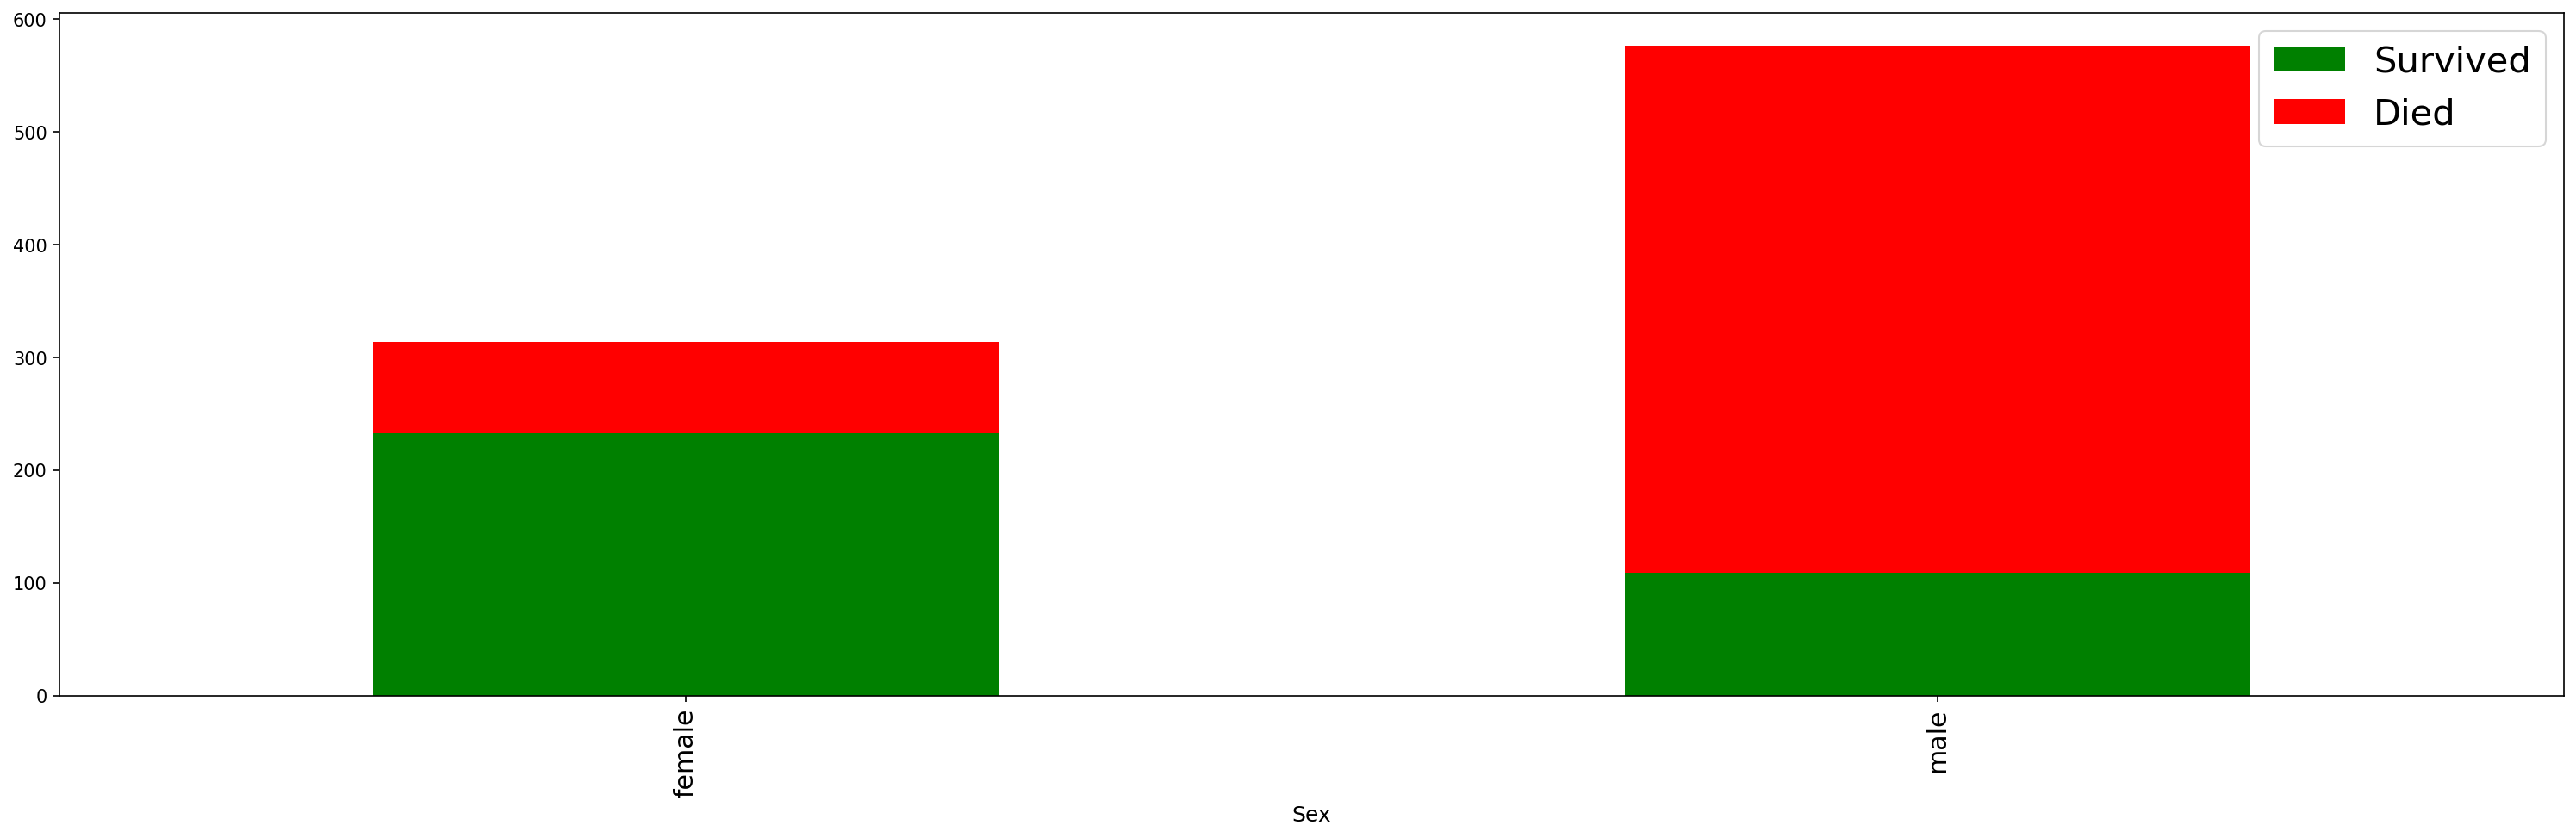

In [26]:
#Plot survival by gender
df['Died'] = 1 - df['Survived']
df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',figsize=(25,7),
                                                        stacked=True, color = ['g','r'])

<AxesSubplot:xlabel='Sex'>

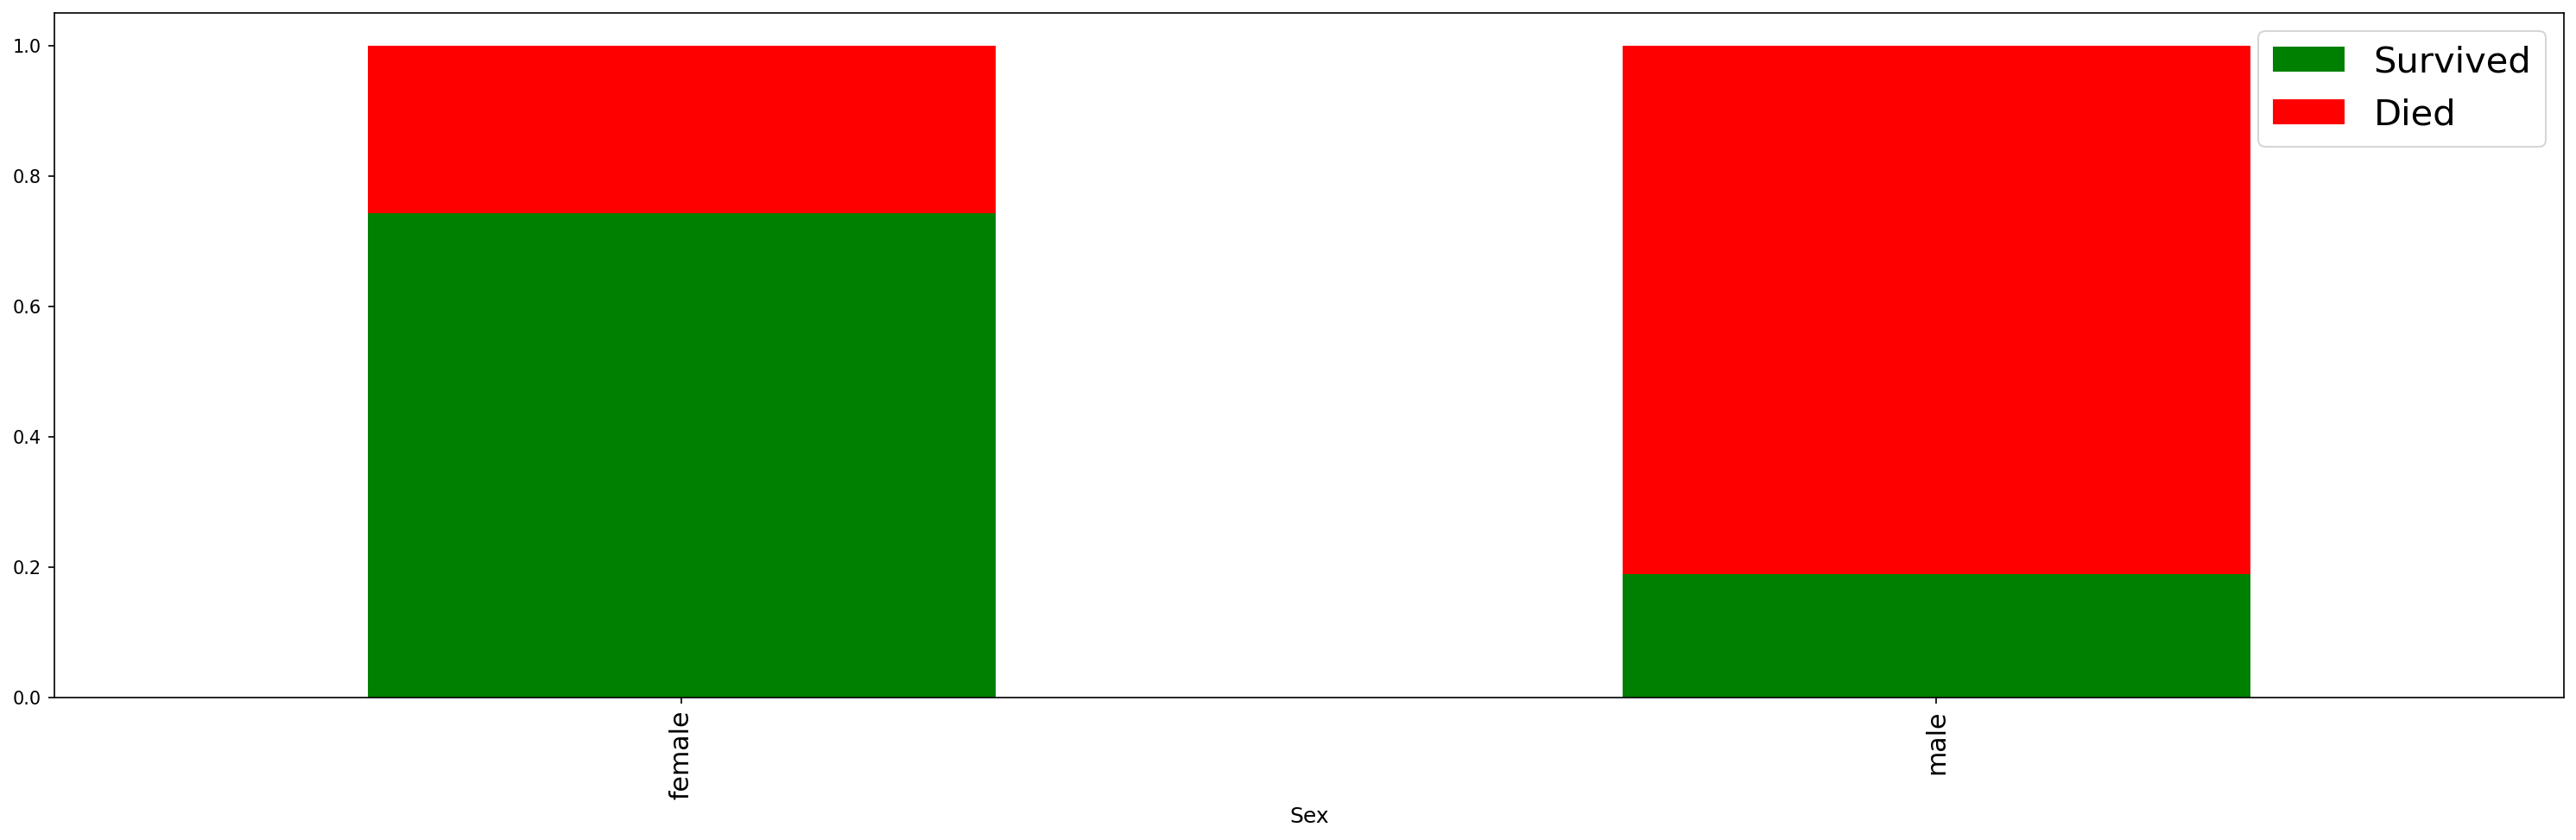

In [27]:
#same plot but normalized (difference is mean aggrigation as opposed to sum aggregation (above))
df.groupby('Sex').agg('mean')[['Survived','Died']].plot(kind='bar', figsize=(25,7),
                                                       stacked=True, color = ['g','r'])

In [31]:
#Women tent to survive at a higher rate than men (70ish% vs. 20ish%, respectively)

### Age

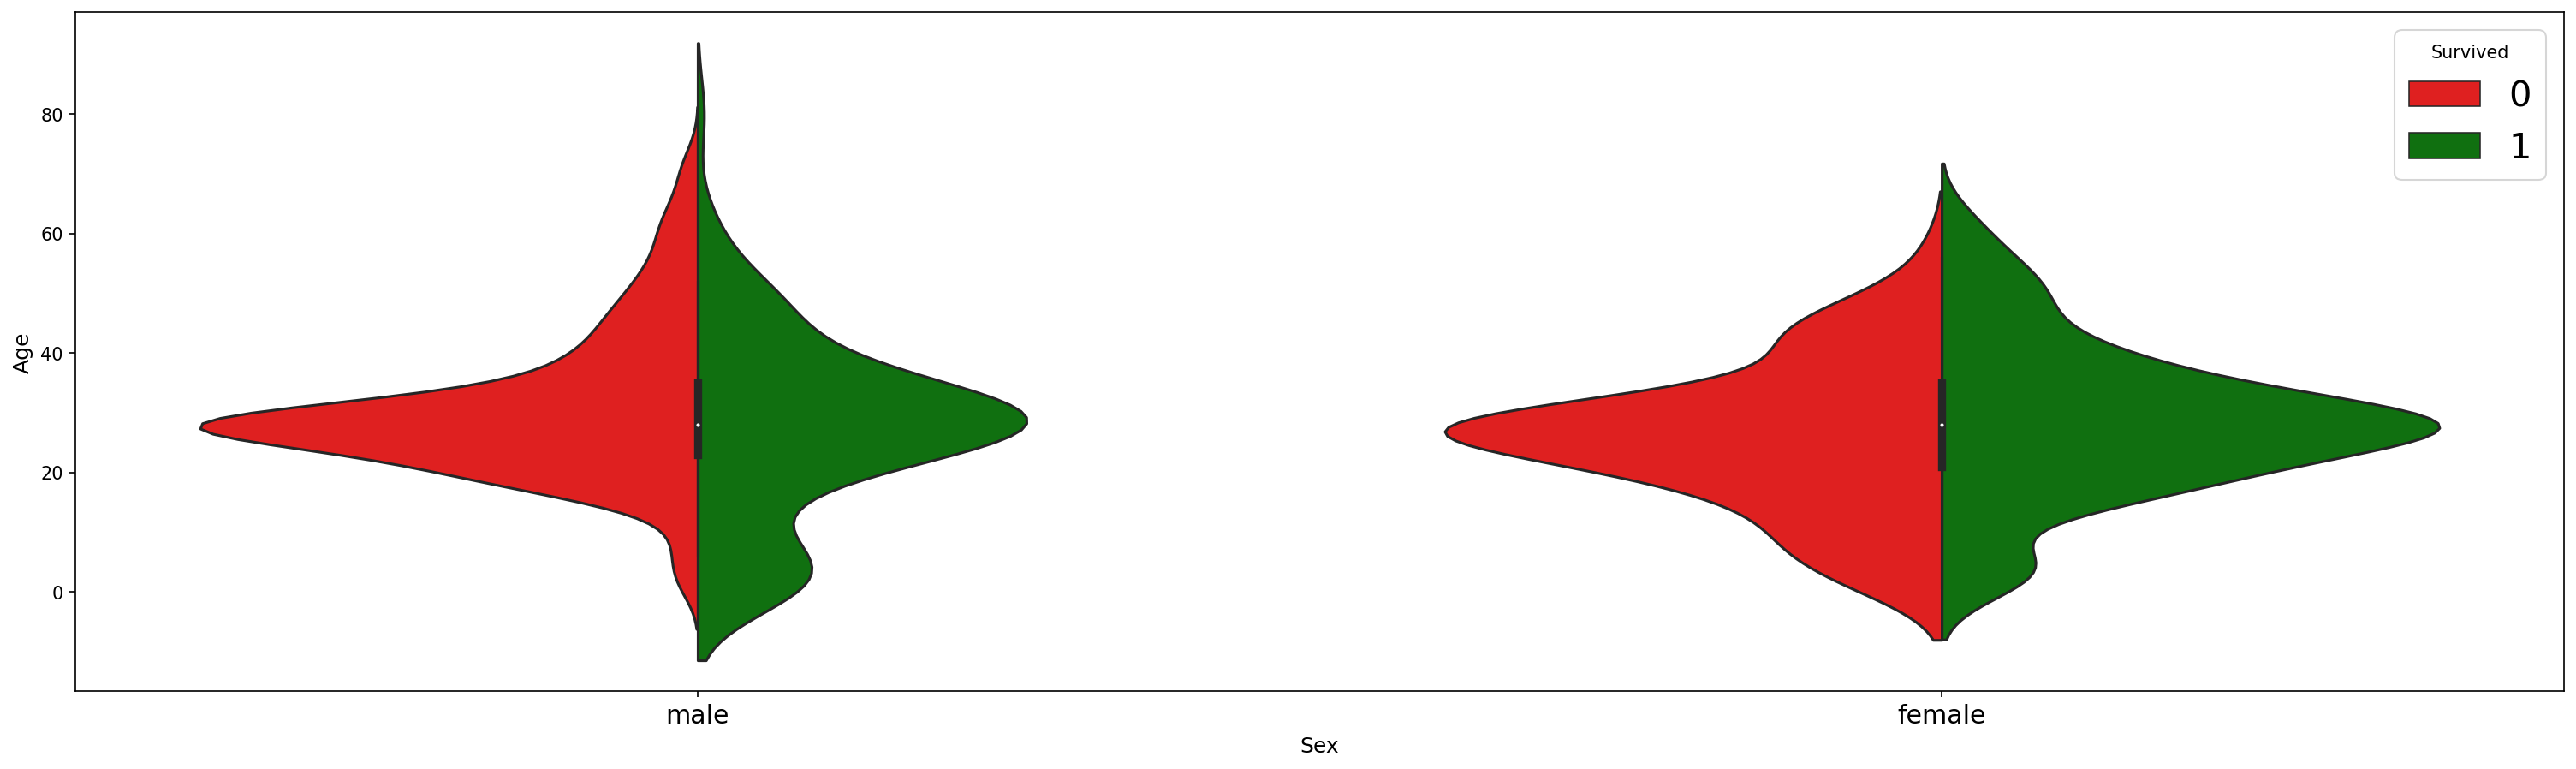

In [34]:
#plot survival by age (broken out by gender)
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex',y='Age',
              hue='Survived', data=df,
               split=True,
               palette={0: "r", 1: "g"}
              );

In [35]:
# More men appear to have died than women based on comparison of red areas.  Men tend to survive more
#if young whereas women do not.

### Ticketprice